In [1]:
import pandas
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
#import pandasql
sns.set_palette("deep", desat=0.6)
sns.set_context(rc={"figure.figsize": (8,4)})

%matplotlib inline

In [2]:
days = pandas.read_csv("days_only_2014.csv", index_col=0)

In [3]:
days.head()

,TotalTimeSeconds,DistanceMeters,MaximumSpeed,Calories,AverageSpeed,Miles,Minutes,Trip_hours,average_mph,maximum_mph
2014-01-02,1179.255000,9686.530000,12.260000,384.000000,8.045000,6.018946,19.654250,0.327571,17.995985,27.424907
2014-01-03,1219.643333,9529.123333,11.491667,399.666667,7.476667,5.921137,20.327389,0.338790,16.725549,25.706190
2014-01-06,1157.545000,9690.615000,12.605000,377.500000,8.185000,6.021484,19.292417,0.321540,18.310613,28.196652
2014-01-07,1198.012500,9527.442500,11.667500,397.500000,7.647500,5.920093,19.966875,0.332781,17.104882,26.099519
2014-01-08,1248.662500,9596.760000,10.887500,391.750000,7.347500,5.963165,20.811042,0.346851,16.438327,24.354704


In [4]:
#total per business day (some days had multiple trips)
cleaner = days.dropna() #this drops a lot of rows since it's using 'any' NA by default 
somedays = cleaner.astype('int')
#somedays = days.astype('int') #can't just do this straightaway, because NA can't be 'int'

In [13]:
somedays.describe()

,TotalTimeSeconds,DistanceMeters,MaximumSpeed,Calories,AverageSpeed,Miles,Minutes,Trip_hours,average_mph,maximum_mph
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167,167.000000,167.000000
mean,1180.197605,9138.790419,11.263473,390.479042,6.808383,4.880240,19.167665,0,15.910180,25.868263
std,260.588381,2484.813655,1.804291,98.312805,1.145626,1.582291,4.325120,0,2.562064,3.963008
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,3.000000
25%,1129.500000,9429.000000,11.000000,373.500000,7.000000,5.000000,18.500000,0,16.000000,25.000000
50%,1198.000000,9569.000000,11.000000,397.000000,7.000000,5.000000,19.000000,0,17.000000,26.000000
75%,1269.500000,9701.500000,12.000000,436.000000,7.000000,6.000000,21.000000,0,17.000000,27.500000
max,2815.000000,19348.000000,18.000000,797.000000,11.000000,12.000000,46.000000,0,24.000000,40.000000


In [15]:
somedays.Calories.sum()

65210

In [10]:
font = {'family': 'arial',
        'weight': 'regular',
        'size' : 30}
matplotlib.rc('font', **font)

(0, 1000)

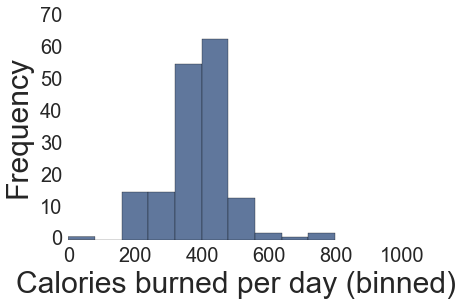

In [12]:
days['Calories'].hist() #pandas hist function seems happier than matplotlib's in this case (was giving an attribute error)
plt.xlabel('Calories burned per day (binned)', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.xlim(0,1000)
# matplotlib.rc('xtick', labelsize=20)
# matplotlib.rc('ytick', labelsize=20)

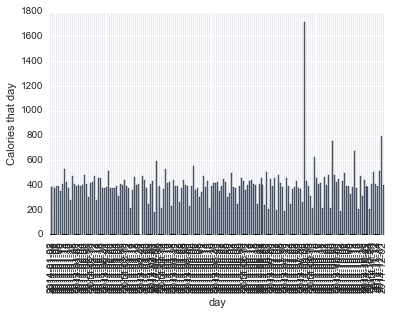

In [7]:
#still a little crowded, but ok for now
plt.figure()

plt.rcParams['figure.figsize'] = 20, 8
somedays['Calories'].plot(kind='bar')
plt.xlabel('day')
plt.ylabel('Calories that day')

In [8]:
days2 = somedays.reset_index()

q="""SELECT *
FROM days2
ORDER BY RANDOM()
LIMIT 100"""

subset = pandasql.sqldf(q, locals())

/Users/szeitlin/anaconda/lib/python2.7/site-packages/pandas/io/sql.py:1607: FutureWarning: write_frame is deprecated, use to_sql
  warnings.warn("write_frame is deprecated, use to_sql", FutureWarning)
/Users/szeitlin/anaconda/lib/python2.7/site-packages/pandas/io/sql.py:1569: FutureWarning: frame_query is deprecated, use read_sql
  warnings.warn("frame_query is deprecated, use read_sql", FutureWarning)


In [9]:
subset.head() #omg it loses the index if you don't make it back into a column again 

,index,TotalTimeSeconds,DistanceMeters,MaximumSpeed,Calories,AverageSpeed
0,2014-06-09,1319,11111,12,457,8
1,2014-04-29,1148,9474,12,403,7
2,2014-03-19,1196,9577,12,411,7
3,2014-06-26,1301,11181,12,507,8
4,2014-09-30,1164,9549,12,422,7


In [10]:
#need to reset the date as the index
date_subset = subset.set_index(['index'])
date_subset.head()

,TotalTimeSeconds,DistanceMeters,MaximumSpeed,Calories,AverageSpeed
index,,,,,
2014-06-09,1319,11111,12,457,8
2014-04-29,1148,9474,12,403,7
2014-03-19,1196,9577,12,411,7
2014-06-26,1301,11181,12,507,8
2014-09-30,1164,9549,12,422,7


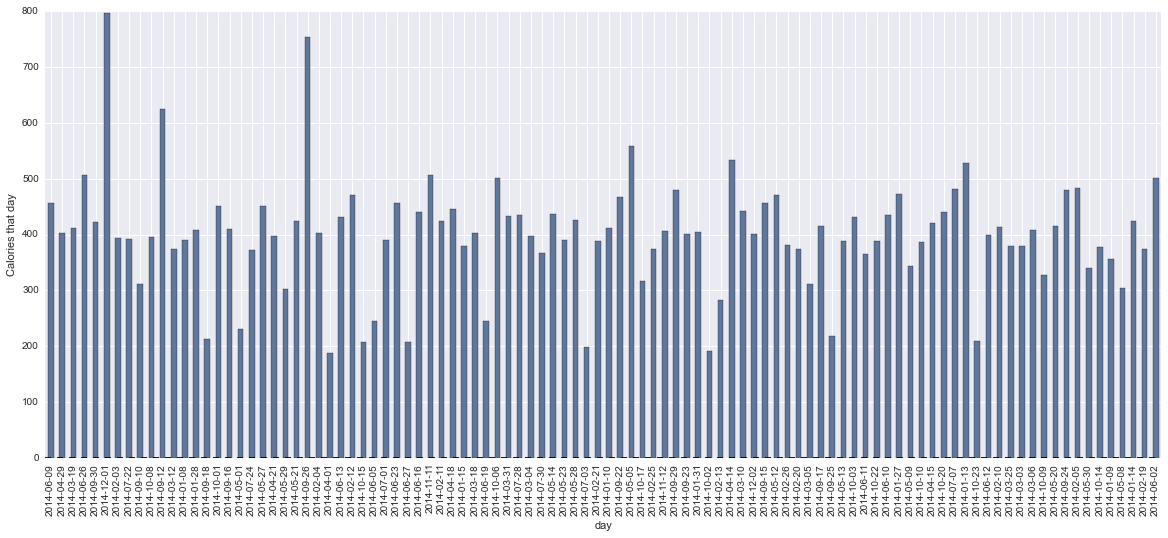

In [11]:
plt.figure()
plt.rcParams['figure.figsize'] = 18, 8
date_subset['Calories'].plot(kind='bar')
plt.xlabel('day')
plt.ylabel('Calories that day')